# Family Relationships Ontology

This example is a part of [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners), and it has been inspired by [this blog post](https://habr.com/post/270857/).

I always find it difficult to remember different relationships between people in a family. In this example, we will take an ontology that defines family relationships, and the actual genealogical tree, and show how we can then perform automatic inference to find all relatives.

### Getting the Genealogical Tree

As an example, we will take genealogical tree of [Romanov Tsar Family](https://en.wikipedia.org/wiki/House_of_Romanov). The most common format for describing family relationships is [GEDCOM](https://en.wikipedia.org/wiki/GEDCOM). We will take Romanov family tree in GEDCOM format:

In [1]:
!head -15 data/tsars.ged

0 HEAD
1 CHAR UTF8
1 GEDC
2 VERS 5.5
0 @0@ INDI
1 NAME Mihail Fedorovich /Romanov/
1 SEX M
1 BIRT
2 DATE 1613
1 DEAT 
2 DATE 1645
1 FAMS @41@
0 @1@ INDI
1 NAME Evdokija Lukjanovna /Streshneva/
1 SEX F


To use GEDCOM file, we can use `python-gedcom` library:

In [9]:
import sys
!{sys.executable} -m pip install python-gedcom


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip


This library takes away some of the technical problems with file parsing, but it still gives us pretty low-level access to all individuals and families in the tree. Here is how we can parse the file, and show the list of all individuals:

In [1]:
from gedcom.parser import Parser
from gedcom.element.individual import IndividualElement
from gedcom.element.family import FamilyElement
g = Parser()
g.parse_file('data/tsars.ged')

In [2]:
d = g.get_element_dictionary()
[ (k,v.get_name()) for k,v in d.items() if isinstance(v,IndividualElement)]

[('@0@', ('Mihail Fedorovich', 'Romanov')),
 ('@1@', ('Evdokija Lukjanovna', 'Streshneva')),
 ('@2@', ('Aleksej Mihajlovich', 'Romanov')),
 ('@3@', ('Marija Ilinichna', 'Miloslavskaja')),
 ('@4@', ('Natalja Kirillovna', 'Naryshkina')),
 ('@5@', ('Marfa Matveevna', 'Apraksina')),
 ('@6@', ('Fedor Alekseevich', 'Romanov')),
 ('@7@', ('Sofja Aleksevna', 'Romanova')),
 ('@8@', ('Ivan V Alekseevich', 'Romanov')),
 ('@9@', ('Praskovja Fedorovna', 'Saltykova')),
 ('@10@', ('Ekaterina Ivanovna', 'Romanova')),
 ('@11@', ('Anna Ivanovna', 'Romanova')),
 ('@12@', ('Fridrih Vilgelm', 'Kurlandskij')),
 ('@13@', ('Karl Leopold', 'Meklenburg-Shverinskij')),
 ('@14@', ('Anna Leopoldovna', 'Meklenburg-Shverinskaja')),
 ('@15@', ('Anton Ulrih', 'Braunshvejg-Volfenbjuttelskij')),
 ('@16@', ('Ivan VI Antonovich', 'Braunshvejg-Volfenbjuttelskij')),
 ('@17@', ('Petr I Alekseevich', 'Romanov')),
 ('@18@', ('Evdokija Fedorovna', 'Lopuhina')),
 ('@19@', ('Ekaterina I Alekseevna', 'Mihajlova')),
 ('@20@', ('Ale

Here is how we can get information about families. Note that is gives us a list of **identifiers**, and we need to convert them to names if we want more clarity:

In [3]:
d = g.get_element_dictionary()
[ (k,[x.get_value() for x in v.get_child_elements()]) for k,v in d.items() if isinstance(v,FamilyElement)]

[('@41@', ['@0@', '@1@', '@2@']),
 ('@42@', ['@2@', '@3@', '@6@', '@7@', '@8@']),
 ('@43@', ['@8@', '@9@', '@10@', '@11@']),
 ('@44@', ['@13@', '@10@', '@14@']),
 ('@45@', ['@15@', '@14@', '@16@']),
 ('@46@', ['@2@', '@4@', '@17@']),
 ('@47@', ['@17@', '@18@', '@20@']),
 ('@48@', ['@20@', '@21@', '@22@']),
 ('@49@', ['@17@', '@19@', '@23@', '@24@']),
 ('@50@', ['@25@', '@23@', '@26@']),
 ('@51@', ['@26@', '@27@', '@28@']),
 ('@52@', ['@28@', '@30@', '@31@', '@33@']),
 ('@53@', ['@33@', '@34@', '@35@']),
 ('@54@', ['@35@', '@36@', '@37@']),
 ('@55@', ['@37@', '@38@', '@39@'])]

In [ ]:
# update and install graphviz
!sudo apt-get update
!sudo apt-get install -y graphviz

Get:1 https://dl.yarnpkg.com/debian stable InRelease [17.1 kB]
Get:2 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal InRelease [3632 B]
Get:3 https://dl.yarnpkg.com/debian stable/main amd64 Packages [11.8 kB]       
Get:4 https://dl.yarnpkg.com/debian stable/main all Packages [11.8 kB]         
Get:5 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main amd64 Packages [319 kB]
Get:6 https://packages.microsoft.com/repos/microsoft-ubuntu-focal-prod focal/main all Packages [2938 B]
Get:7 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable InRelease [3961 B]
Get:8 https://repo.anaconda.com/pkgs/misc/debrepo/conda stable/main amd64 Packages [4557 B]
Get:9 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]                
Get:11 http://security.ubuntu.com/ubuntu focal-security InRelease [128 kB]     
Get:10 https://packagecloud.io/github/git-lfs/ubuntu focal InRelease [28.0 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates InRe

In [5]:
!pip install graphviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
# graphviz visualization
from graphviz import Digraph
dot = Digraph()

d = g.get_element_dictionary()

# unigrams
for k,v in d.items():
    if isinstance(v,IndividualElement):
        dot.node(k,' '.join(v.get_name()))
# tree
for k,v in d.items():
    if isinstance(v,FamilyElement):
        for x in v.get_child_elements():
            if x.get_tag() == 'HUSB':
                dot.edge(k,x.get_value(), label='husband')
            if x.get_tag() == 'WIFE':
                dot.edge(k,x.get_value(), label='wife')
            if x.get_tag() == 'CHIL':
                dot.edge(k,x.get_value(), label='child')

dot
                

### Getting Family Ontology

Next, let's have a look at [family ontology](https://raw.githubusercontent.com/blokhin/genealogical-trees/master/data/header.ttl) defined as a set of Semantic Web triplets. This ontology defines such relationships as `isUncleOf`, `isCousinOf`, and many others. All those relationships are defined in terms of basic predicates `isMotherOf`, `isFatherOf`, `isBrotherOf` and `isSisterOf`. We will use automatic reasoning to deduce all other relationships using the ontology.

Here is a sample definition of `isAuntOf` property, which is defined as a composition of `isSisterOf` and `isParentOf` (*Aunt is a sister of one's parent*).

```
fhkb:isAuntOf a owl:ObjectProperty ;
    rdfs:domain fhkb:Woman ;
    rdfs:range fhkb:Person ;
    owl:propertyChainAxiom ( fhkb:isSisterOf fhkb:isParentOf ) .
```

In [18]:
!head -20 data/onto.ttl

@prefix fhkb: <http://www.example.com/genealogy.owl#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xml: <http://www.w3.org/XML/1998/namespace> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://www.example.com/genealogy.owl#> a owl:Ontology .

fhkb:DomainEntity a owl:Class .

fhkb:Man a owl:Class ;
    owl:equivalentClass [ a owl:Class ;
            owl:intersectionOf ( fhkb:Person [ a owl:Restriction ;
                        owl:onProperty fhkb:hasSex ;
                        owl:someValuesFrom fhkb:Male ] ) ] .

fhkb:Woman a owl:Class ;
    owl:equivalentClass [ a owl:Class ;
            owl:intersectionOf ( fhkb:Person [ a owl:Restriction ;


### Constructing Ontology for Inference

For simplicity, we will create one ontology file that will include original rules from family ontology, and facts about individuals from our GEDCOM file. We will go through the GEDCOM file and extract information about families and individuals, and convert them to triplets.

In [63]:
!cp data/onto.ttl .

gedcom_dict = g.get_element_dictionary()
individuals, marriages = {}, {}

def term2id(el):
    return "i" + el.get_pointer().replace('@', '').lower()

out = open("onto.ttl","a")

for k, v in gedcom_dict.items():
    if isinstance(v,IndividualElement):
        children, siblings = set(), set()
        idx = term2id(v)

        title = v.get_name()[0] + " " + v.get_name()[1]
        title = title.replace('"', '').replace('[', '').replace(']', '').replace('(', '').replace(')', '').strip()

        own_families = g.get_families(v, 'FAMS')
        for fam in own_families:
            children |= set(term2id(i) for i in g.get_family_members(fam, "CHIL"))

        parent_families = g.get_families(v, 'FAMC')
        if len(parent_families):
            for member in g.get_family_members(parent_families[0], "CHIL"): # NB adoptive families i.e len(parent_families)>1 are not considered (TODO?)
                if member.get_pointer() == v.get_pointer():
                    continue
                siblings.add(term2id(member))

        if idx in individuals:
            children |= individuals[idx].get('children', set())
            siblings |= individuals[idx].get('siblings', set())
        individuals[idx] = {'sex': v.get_gender().lower(), 'children': children, 'siblings': siblings, 'title': title}

    elif isinstance(v,FamilyElement):
        wife, husb, children = None, None, set()
        children = set(term2id(i) for i in g.get_family_members(v, "CHIL"))

        try:
            wife = g.get_family_members(v, "WIFE")[0]
            wife = term2id(wife)
            if wife in individuals: individuals[wife]['children'] |= children
            else: individuals[wife] = {'children': children}
        except IndexError: pass
        try:
            husb = g.get_family_members(v, "HUSB")[0]
            husb = term2id(husb)
            if husb in individuals: individuals[husb]['children'] |= children
            else: individuals[husb] = {'children': children}
        except IndexError: pass

        if wife and husb: marriages[wife + husb] = (term2id(v), wife, husb)

for idx, val in individuals.items():
    added_terms = ''
    if val['sex'] == 'f':
        parent_predicate, sibl_predicate = "isMotherOf", "isSisterOf"
    else:
        parent_predicate, sibl_predicate = "isFatherOf", "isBrotherOf"
    if len(val['children']):
        added_terms += " ;\n    fhkb:" + parent_predicate + " " + ", ".join(["fhkb:" + i for i in val['children']])
    if len(val['siblings']):
        added_terms += " ;\n    fhkb:" + sibl_predicate + " " + ", ".join(["fhkb:" + i for i in val['siblings']])
    out.write("fhkb:%s a owl:NamedIndividual, owl:Thing%s ;\n    rdfs:label \"%s\" .\n" % (idx, added_terms, val['title']))

for k, v in marriages.items():
    out.write("fhkb:%s a owl:NamedIndividual, owl:Thing ;\n    fhkb:hasFemalePartner fhkb:%s ;\n    fhkb:hasMalePartner fhkb:%s .\n" % v)

out.write("[] a owl:AllDifferent ;\n    owl:distinctMembers (")
for idx in individuals.keys():
    out.write("    fhkb:" + idx)
for k, v in marriages.items():
    out.write("    fhkb:" + v[0])
out.write("    ) .")
out.close()

In [ ]:
!pip install rdflib

In [66]:
# visualize added onto using graphviz
from rdflib import Graph
from rdflib.tools.rdf2dot import rdf2dot

g_onto = Graph()
g_onto.parse("onto.ttl", format="ttl")
rdf2dot(g_onto, open("onto.dot", "w"))



In [67]:
# parse nodes and edges from a dot file
def parse_dot(dot_file):
    lines = open(dot_file, 'r').readlines()
    nodes = []
    edges = []
    for line in lines:
        if line.startswith('node'):
            nodes.append(line)
        if '->' in line:
            edges.append(line)
    return nodes, edges

def filter_dot(dot_file, out_file):
    nodes, edges = parse_dot(dot_file)
    edges = [edge for edge in edges if 'fhkb' in edge]

    filtered_nodes = set()

    for edge in edges:
        src, dst = edge.strip().split('->')
        src = src.strip().split(' ')[0]
        dst = dst.strip().split(' ')[0]

        filtered_nodes.add(src)
        filtered_nodes.add(dst)
    
    nodes = [node for node in nodes if node.strip().split(' ')[0] in filtered_nodes]
    
    # write to file
    with open(out_file, 'w') as f:
        f.write("digraph G {\n")
        f.write("rankdir=BT;\n")
        for edge in edges:
            f.write(edge)
        for node in nodes:
            f.write(node)
        f.write("}")


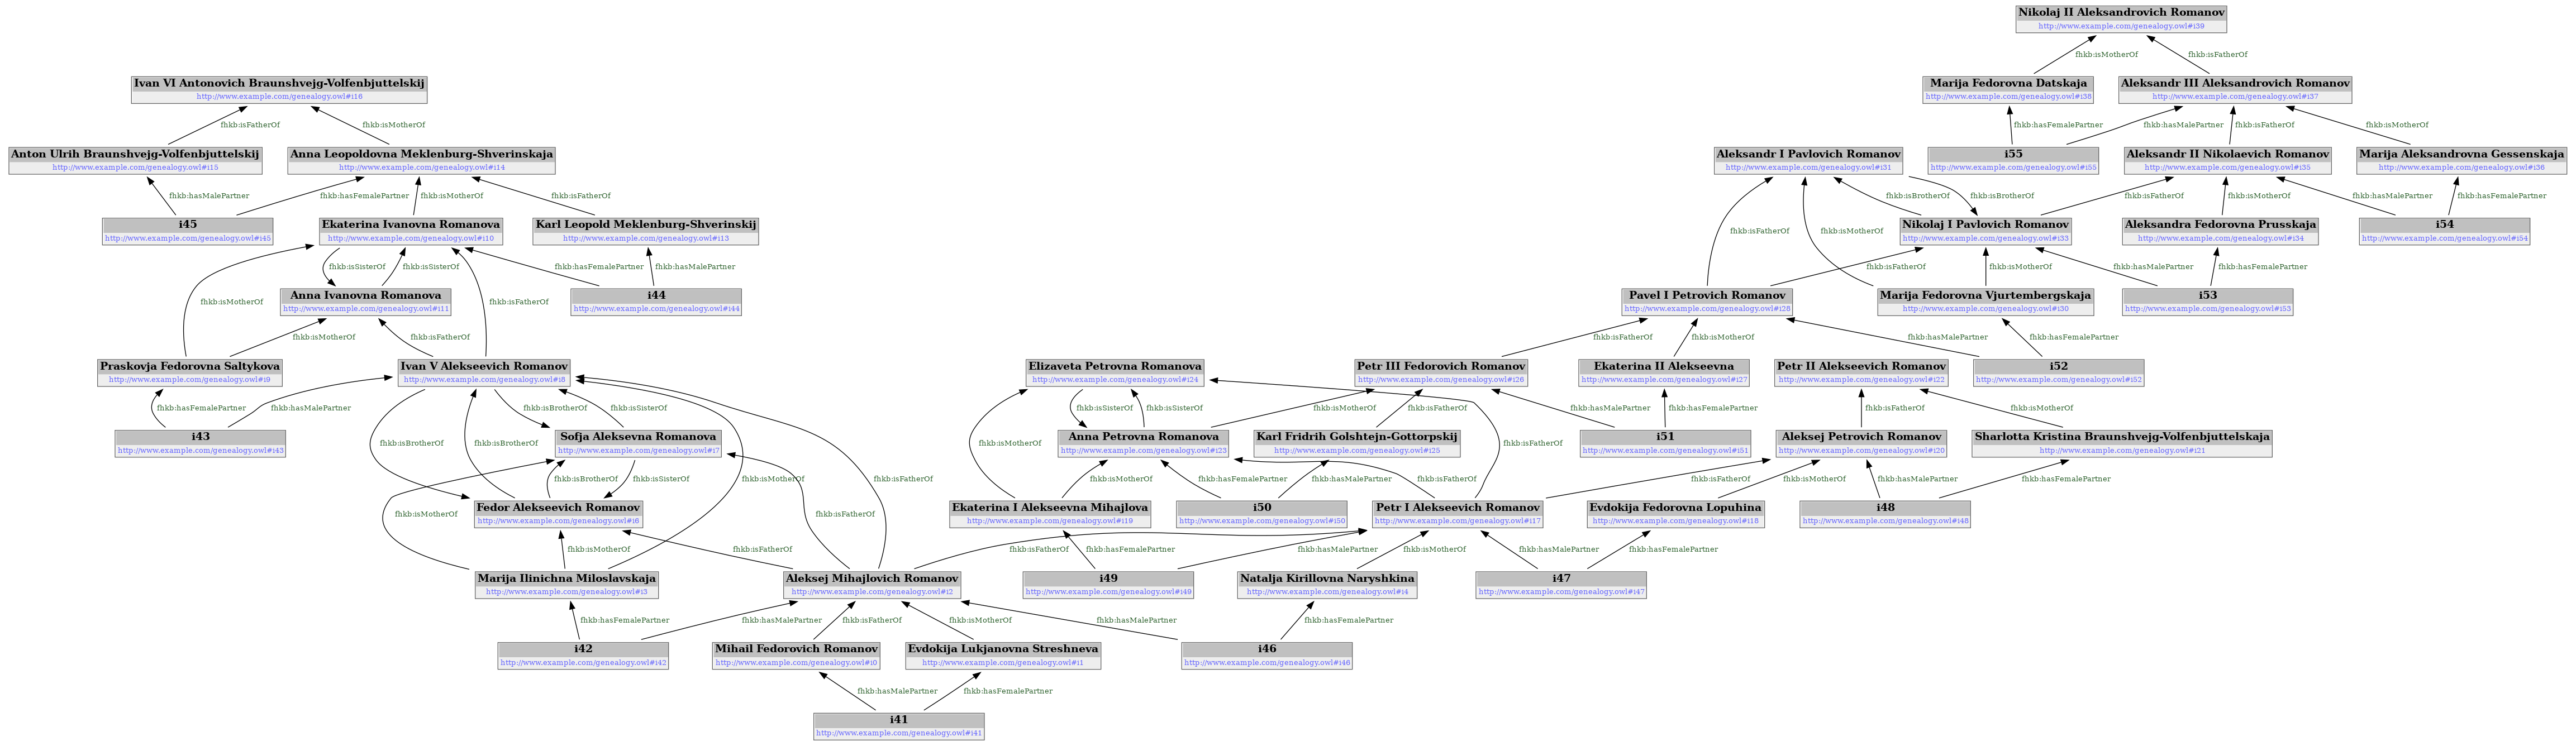

In [69]:
filter_dot('onto.dot', 'onto_filtered.dot')
!dot -Tpng onto_filtered.dot -o onto_filtered.png

from IPython.display import Image
Image(filename='onto_filtered.png')


In [20]:
!tail onto.ttl

    fhkb:hasFemalePartner fhkb:i34 ;
    fhkb:hasMalePartner fhkb:i33 .
fhkb:i54 a owl:NamedIndividual, owl:Thing ;
    fhkb:hasFemalePartner fhkb:i36 ;
    fhkb:hasMalePartner fhkb:i35 .
fhkb:i55 a owl:NamedIndividual, owl:Thing ;
    fhkb:hasFemalePartner fhkb:i38 ;
    fhkb:hasMalePartner fhkb:i37 .
[] a owl:AllDifferent ;
    owl:distinctMembers (    fhkb:i0    fhkb:i1    fhkb:i2    fhkb:i3    fhkb:i4    fhkb:i5    fhkb:i6    fhkb:i7    fhkb:i8    fhkb:i9    fhkb:i10    fhkb:i11    fhkb:i12    fhkb:i13    fhkb:i14    fhkb:i15    fhkb:i16    fhkb:i17    fhkb:i18    fhkb:i19    fhkb:i20    fhkb:i21    fhkb:i22    fhkb:i23    fhkb:i24    fhkb:i25    fhkb:i26    fhkb:i27    fhkb:i28    fhkb:i29    fhkb:i30    fhkb:i31    fhkb:i32    fhkb:i33    fhkb:i34    fhkb:i35    fhkb:i36    fhkb:i37    fhkb:i38    fhkb:i39    fhkb:i40    fhkb:i41    fhkb:i42    fhkb:i43    fhkb:i44    fhkb:i45    fhkb:i46    fhkb:i47    fhkb:i48    fhkb:i49    fhkb:i50    fhkb:i51    fhkb:i52    fhkb:i53    fhkb:

### Doing Inference 

Now we want to be able to use this ontology for inference and for querying. We will use [RDFLib](https://github.com/RDFLib), library for reading RDF Graph in different formats, querying it, etc. 

For logical inference, we will use [OWL-RL](https://github.com/RDFLib/OWL-RL) library, which allows us to build **Closure** of the RDF Graph, i.e. add all possible concepts and relations that can be inferred.

In [71]:
!pip install rdflib
!pip install git+https://github.com/RDFLib/OWL-RL.git


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
  Cloning https://github.com/RDFLib/OWL-RL.git to /tmp/pip-req-build-wtmpihkh
  Running command git clone --filter=blob:none --quiet https://github.com/RDFLib/OWL-RL.git /tmp/pip-req-build-wtmpihkh
  Resolved https://github.com/RDFLib/OWL-RL.git to commit 75927147fdaf767f2805993ccb7f027a3e387226
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


Let's open the ontology file and see how many triplets it contains:

In [72]:
import rdflib
from owlrl import DeductiveClosure, OWLRL_Extension

g = rdflib.Graph()
g.parse("onto.ttl", format="turtle")

print("Triplets found:%d" % len(g))

Triplets found:669


Now let's build the closure, and see how the number of triplets increase:

In [73]:
DeductiveClosure(OWLRL_Extension).expand(g)
print("Triplets after inference:%d" % len(g))

Triplets after inference:4246


In [ ]:
rdf2dot(g, open("onto_expanded.dot", "w"))

# it takes long time for rendering
filter_dot('onto_expanded.dot', 'onto_ex_filtered.dot')
!dot -Tpng onto_ex_filtered.dot -o onto_ex_filtered.png

from IPython.display import Image
Image(filename='onto_ex_filtered.png')


^C


### Querying for Relatives 

Now we can query the graph to see different relations between people. We can use **SPARQL** language together with `query` method. In our case, let's see all **uncles** in our family tree:

In [76]:
qres = g.query(
    """SELECT DISTINCT ?aname ?bname
       WHERE {
          ?a fhkb:isUncleOf ?b .
          ?a rdfs:label ?aname .
          ?b rdfs:label ?bname .
       }""")

for row in qres:
    print("%s is uncle of %s" % row)

Aleksandr I Pavlovich Romanov is uncle of Aleksandr II Nikolaevich Romanov
Fedor Alekseevich Romanov is uncle of Ekaterina Ivanovna Romanova
Fedor Alekseevich Romanov is uncle of Anna Ivanovna Romanova


Feel free to experiment with different other family relations. For example, you can have a look at `isAncestorOf` relation, which recurrently defines all ancestors of a given person.

Finally, let's clean up!

In [14]:
!rm onto.ttl